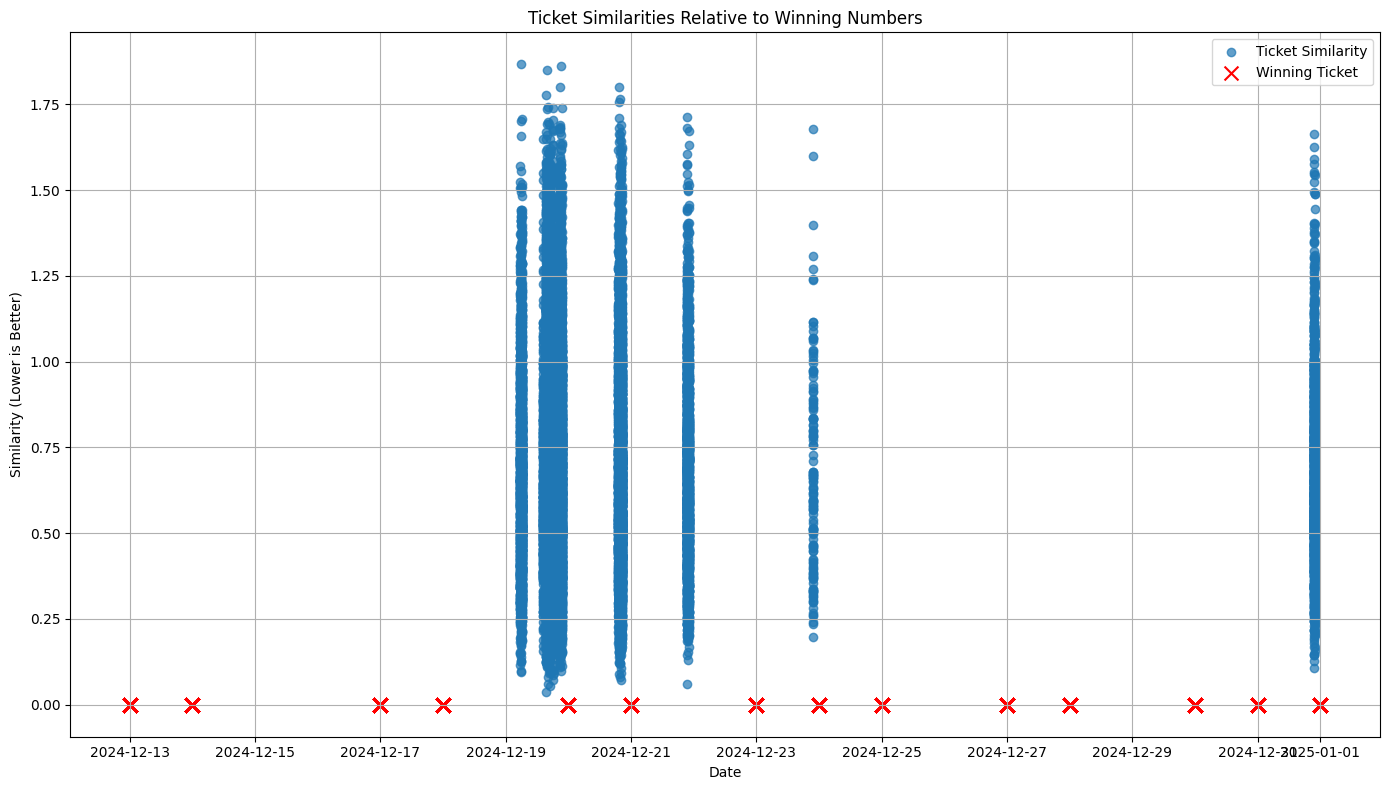

In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# SQL query to fetch all ticket similarities relative to winning tickets
query = """
SELECT 
    wn.id AS winning_id,
    pts.id AS ticket_id,
    wn.white_ball_1, wn.white_ball_2, wn.white_ball_3, wn.white_ball_4, wn.white_ball_5, wn.powerball AS winning_powerball,
    pts.white_ball_1, pts.white_ball_2, pts.white_ball_3, pts.white_ball_4, pts.white_ball_5, pts.powerball AS ticket_powerball,
    wn.draw_date,
    pts.generated_at,
    wn.source AS winning_source,
    pts.source AS ticket_source,
    pts.embedding <-> ARRAY[
        wn.white_ball_1 / 69.0,
        wn.white_ball_2 / 69.0,
        wn.white_ball_3 / 69.0,
        wn.white_ball_4 / 69.0,
        wn.white_ball_5 / 69.0,
        wn.powerball / 26.0
    ]::vector AS similarity
FROM 
    winning_numbers wn
JOIN 
    powerball_ticket_sessions pts
ON 
    TRUE
ORDER BY 
    similarity ASC;
"""

def fetch_and_plot_all_tickets():
    try:
        # Connect to PostgreSQL
        conn = psycopg2.connect(
            dbname="rag_db",
            user="user",
            password="password",
            host="192.168.0.34",
            port=5432
        )
        cursor = conn.cursor()

        # Execute the query
        cursor.execute(query)
        results = cursor.fetchall()

        # Convert results into a DataFrame
        columns = [
            "winning_id", "ticket_id",
            "winning_white_1", "winning_white_2", "winning_white_3", "winning_white_4", "winning_white_5", "winning_powerball",
            "ticket_white_1", "ticket_white_2", "ticket_white_3", "ticket_white_4", "ticket_white_5", "ticket_powerball",
            "winning_date", "ticket_date", "winning_source", "ticket_source", "similarity"
        ]
        df = pd.DataFrame(results, columns=columns)

        # Convert dates to datetime format
        df['winning_date'] = pd.to_datetime(df['winning_date'])
        df['ticket_date'] = pd.to_datetime(df['ticket_date'])

        # Plot similarity scores
        plt.figure(figsize=(14, 8))
        plt.scatter(df['ticket_date'], df['similarity'], alpha=0.7, label='Ticket Similarity')
        plt.scatter(df['winning_date'], [0] * len(df['winning_date']), color='red', marker='x', label='Winning Ticket', s=100)

        # Add chart details
        plt.title('Ticket Similarities Relative to Winning Numbers')
        plt.xlabel('Date')
        plt.ylabel('Similarity (Lower is Better)')
        plt.legend()
        plt.grid()
        plt.tight_layout()

        # Show the chart
        plt.show()

    except Exception as e:
        print(f"Database error: {e}")
    finally:
        cursor.close()
        conn.close()

# Fetch data and plot the chart
fetch_and_plot_all_tickets()
